In [1]:
# Importing imp libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading filepath using pandas
filepath="https://github.com/dsrscientist/dataset1/raw/master/mushrooms.csv"
df=pd.read_csv(filepath)


In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Finding the missing value
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### lets check class Imbalance

In [7]:
#great there is no missing value
#now we will find what dataset we have in "class"
#in this we found that both there is no class imbalance so, no need of upscaling or downscaling

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

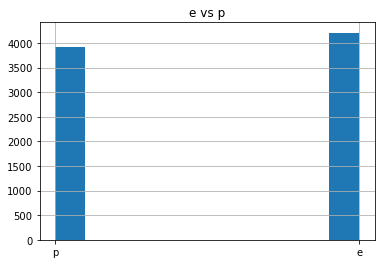

In [8]:
df['class'].hist(grid=True)
plt.title("e vs p")
plt.show()


#from this plot we find there is very less imbalance so we will not use upscaling and downscaling

### split dataset into feature and label

In [12]:
#Now we will split our data into feature(X) and label(X)and we will use "OneHotEncoder" to encode our categorical variables

#Drop target feature
X = df.drop(columns='class') 

#Encode categorical features
X = OneHotEncoder().fit_transform(X)
 
y = df['class'].replace({'p':0, 'e':1})
print('Feature size:',X.shape)
print('label size:',len(y))

Feature size: (8124, 117)
label size: 8124


In [14]:
# Now we will train and test using Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [15]:
max_class = y_train.mode()[0]
base_predictions = [max_class] * len(y_train)

In [16]:
max_class_accuracy = accuracy_score(base_predictions,
                                         y_train)
print(max_class_accuracy)
#we got 52% accuracy of the given the distribution of class in our initial dataset

0.5177719649176796


## let us build model to find best out of it

In [18]:

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
cv = cross_validate(estimator = random_forest, X = X_train, y = y_train, scoring='accuracy', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


In [19]:
random_forest.fit(X_test, y_test)
y_predictions = random_forest.predict(X_train)
accuracy_score(y_train, y_predictions)

0.9899984613017387

In [20]:
#let us build the model

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

[[782   0]
 [  0 843]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [21]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(knn,X,y,cv=5)

#now i will take the mean of it

cross_val_score(knn,X,y,cv=5).mean()

0.9150438044713909

In [22]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

1.0
[[782   0]
 [  0 843]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [23]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(lr,X,y,cv=5)

#now i will take the mean of it

cross_val_score(lr,X,y,cv=5).mean()

0.9193427813565744

In [24]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred))

1.0
[[782   0]
 [  0 843]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [25]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(dt,X,y,cv=3)

#now i will take the mean of it

cross_val_score(dt,X,y,cv=3).mean()

0.8909404234367306

### Hyperparameter tunning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','square','log2'],
                       'max_depth':[1, 2, 3, 4, 5],
                       'criterion':['gini', 'entropy']}
search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_distributions, n_iter=100, scoring='precision', n_jobs=-1, cv=10, verbose=10, return_train_score=True)
 


In [33]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1980s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3942s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   21.1s
[Parallel(n_jo

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'square',
                                                         'log2'],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   return_train_score=True, scoring='precision', verbose=10)

In [34]:
best_model = search.best_estimator_
best_model


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=25)

In [35]:
mod=RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=25)
mod.fit(X_train,y_train)
pred=mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

99.07692307692308


### Saving the model

In [36]:
import joblib
joblib.dump(mod,"MushroomModel.pkl")

['MushroomModel.pkl']

### Loading the saved Model

In [38]:
model=joblib.load("MushroomModel.pkl")
prediction=model.predict(X_test)
prediction=pd.DataFrame(prediction)
prediction.to_csv('results.csv',index=False)